# Heart Disease Prediction - Advanced Analysis

This notebook performs a comprehensive analysis of the Cleveland Heart Disease dataset, trains multiple machine learning models (Logistic Regression, Random Forest, SVM, KNN, Gradient Boosting), and compares their performance to select the best one for the application.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import joblib

# Determine if running from notebook root or project root
import os
DATA_PATH = '../backend/processed.cleveland.data' if os.path.exists('../backend/processed.cleveland.data') else 'backend/processed.cleveland.data'

## 1. Load and Preprocess Data

In [3]:
columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]
df = pd.read_csv(DATA_PATH, header=None, names=columns, na_values='?')

# Handle missing values
print(f"Original shape: {df.shape}")
df = df.dropna()
print(f"Shape after dropping missing values: {df.shape}")

# Convert target to binary
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)
df.head()

Original shape: (303, 14)
Shape after dropping missing values: (297, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## 2. Exploratory Data Analysis (EDA)

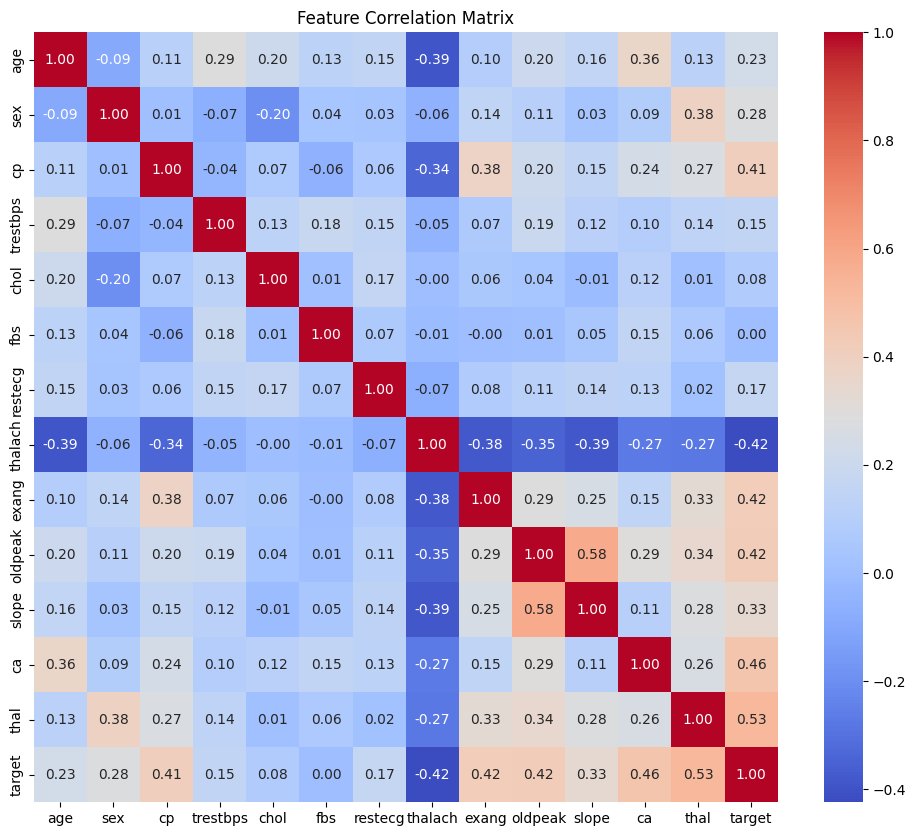

In [4]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

C:\Users\SHATAKSHI BHUSHAN\AppData\Local\Temp\ipykernel_39864\3370084384.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='viridis')


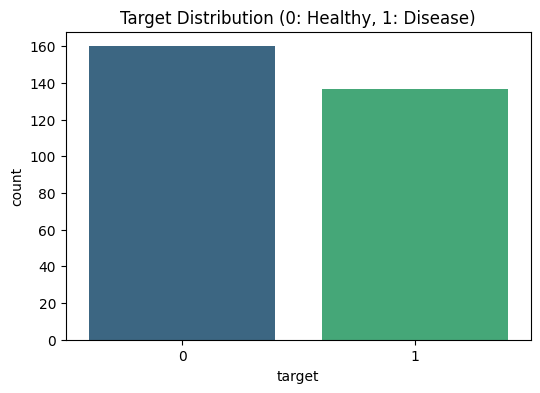

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, palette='viridis')
plt.title("Target Distribution (0: Healthy, 1: Disease)")
plt.show()

## 3. Model Training & Evaluation

--- Logistic Regression ---
Accuracy: 0.8667


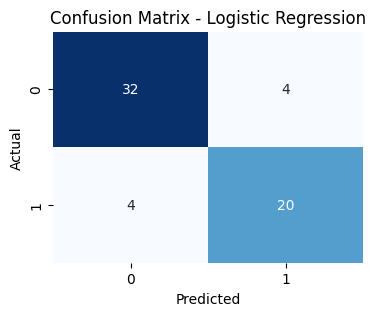

--- Random Forest ---
Accuracy: 0.8833


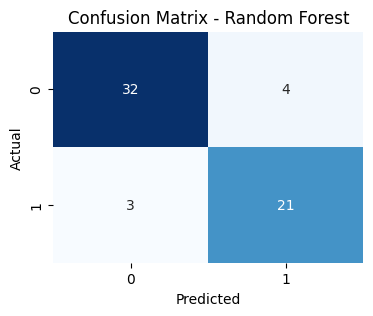

--- SVM ---
Accuracy: 0.8833


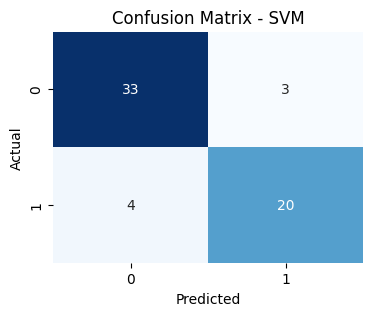

--- KNN ---
Accuracy: 0.8333


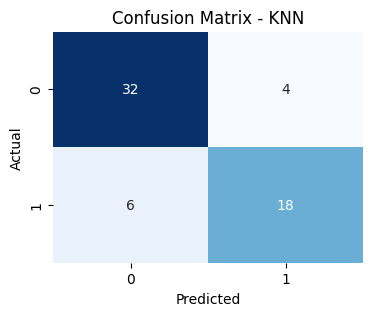

--- Gradient Boosting ---
Accuracy: 0.8000


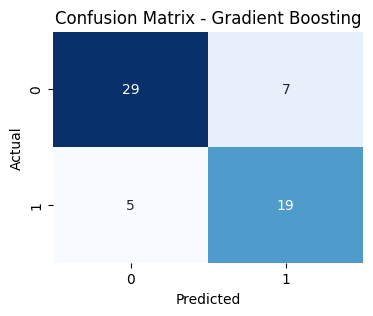

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.866667,0.833333,0.833333,0.833333
1,Random Forest,0.883333,0.840000,0.875000,0.857143
2,SVM,0.883333,0.869565,0.833333,0.851064
3,KNN,0.833333,0.818182,0.750000,0.782609
4,Gradient Boosting,0.800000,0.730769,0.791667,0.760000


In [6]:
X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })
    
    print(f"--- {name} ---")
    print(f"Accuracy: {acc:.4f}")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

results_df = pd.DataFrame(results)
results_df

## 4. Model Comparison

C:\Users\SHATAKSHI BHUSHAN\AppData\Local\Temp\ipykernel_39864\3884499527.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=results_df, palette='magma')


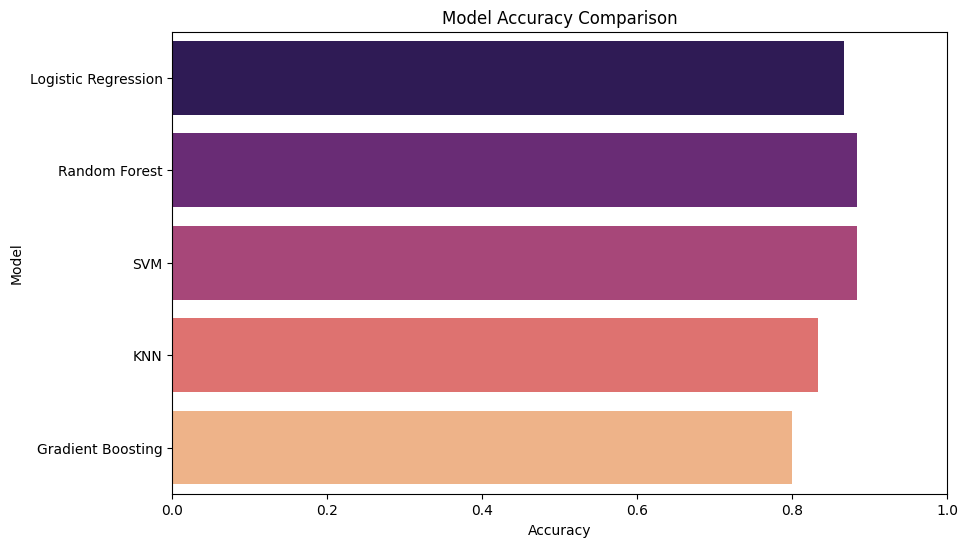

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='magma')
plt.title("Model Accuracy Comparison")
plt.xlim(0, 1.0)
plt.show()